### 5. Resultados Preliminares

#### Pregunta 3 - ¿Existen grupos de juegos con patrones similares que permitan agruparlos para recomendaciones?

#### Análisis Preliminar de los Datos

#### Construcción del Conjunto de Datos
Con respecto a la construcción del conjunto de los datos, para el caso particular de esta pregunta se realiza una separación binaria en el atributo 'game_profile_genre' que permitirá tomar de forma granular el genero de un juego y no como conjunto.

#### Entrenamiento y Evaluación de Modelos

#### Conclusiones Preliminares

#### Posibles Mejoras



In [ ]:
import pandas as pd

csv_path = './df_reduced.csv'
df = pd.read_csv(csv_path, low_memory=False)

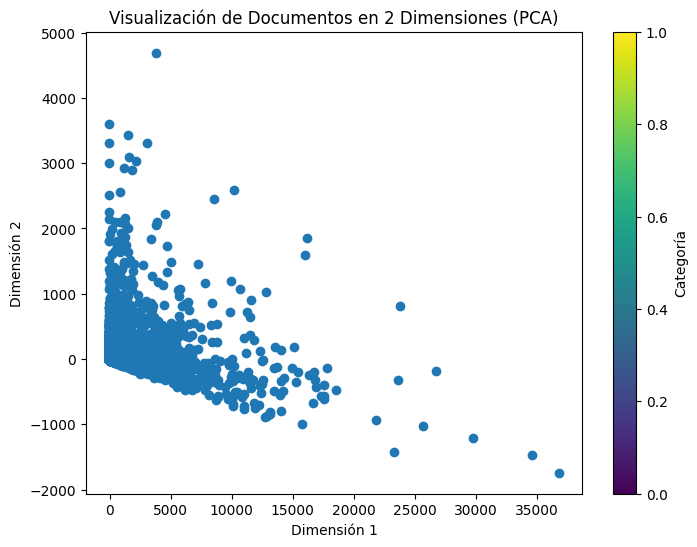

In [10]:
# Aplicar PCA para reducir dimensiones

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

reduced_columns = [
    'game_review_score',
    'review_review_count',
    'game_count_replay',
    'game_count_retired',
    'game_count_comp',
    'game_comp_all_avg',
    'game_invested_mp_avg'
]

df_reduced = df[reduced_columns].dropna().copy()

pca = PCA(n_components=7)
X_pca = pca.fit_transform(df_reduced) 
x = X_pca[:, 0]
y = X_pca[:, 1]
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.colorbar(label='Categoría')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Visualización de Documentos en 2 Dimensiones (PCA)')
plt.show()

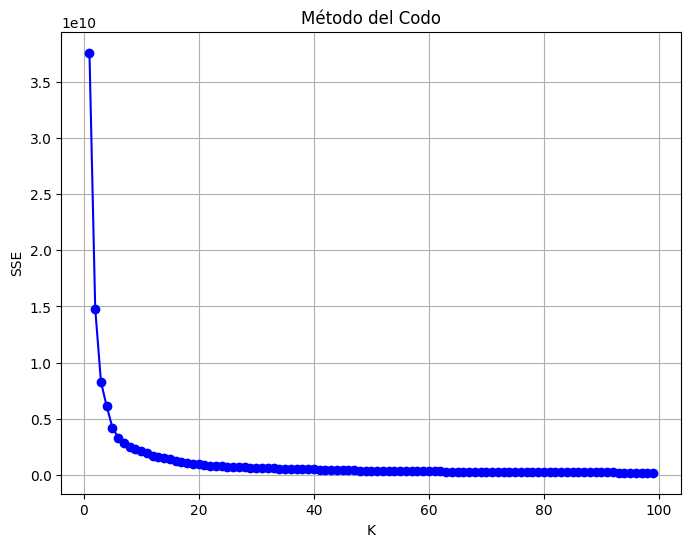

In [ ]:
# Busqueda del mejor k
from sklearn.cluster import KMeans

k_range = range(1, 100)
sse = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o', color='b')
plt.title('Método del Codo')
plt.xlabel('K')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

In [ ]:
# Contrastar con DBScan